<a href="https://colab.research.google.com/github/JuanSeguraUNAL/Mediciones_en_Optica_y_Acustica/blob/master/practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1

In [2]:
# Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

# Diseño de los gráficos
sns.set()
sns.set_context("paper")
sns.set_palette("colorblind")

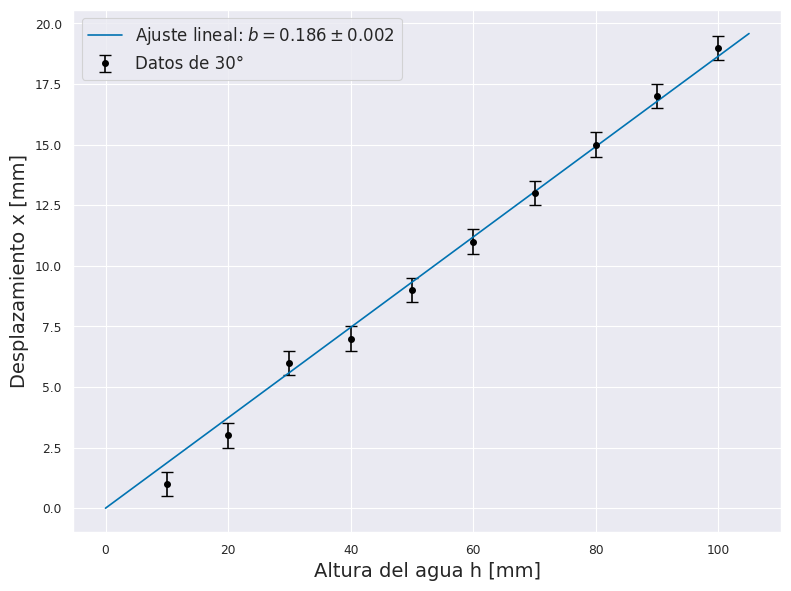

Ángulo incidente: 30.0° ± 0.5°
Pendiente: b = 0.186 ± 0.002
Ángulo de refracción: 21.35°
Índice de refracción: n = 1.37 ± 0.02
--------------------------------------------------


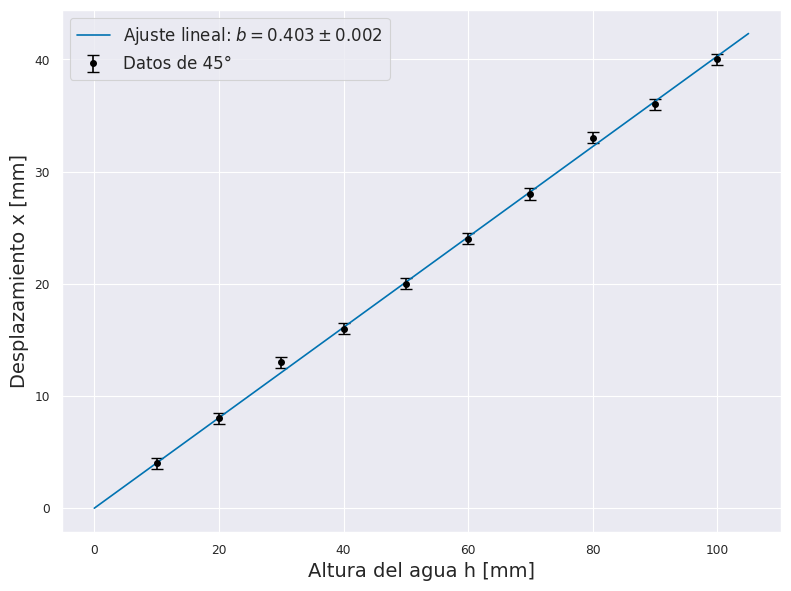

Ángulo incidente: 45.0° ± 0.5°
Pendiente: b = 0.403 ± 0.002
Ángulo de refracción: 30.84°
Índice de refracción: n = 1.38 ± 0.02
--------------------------------------------------


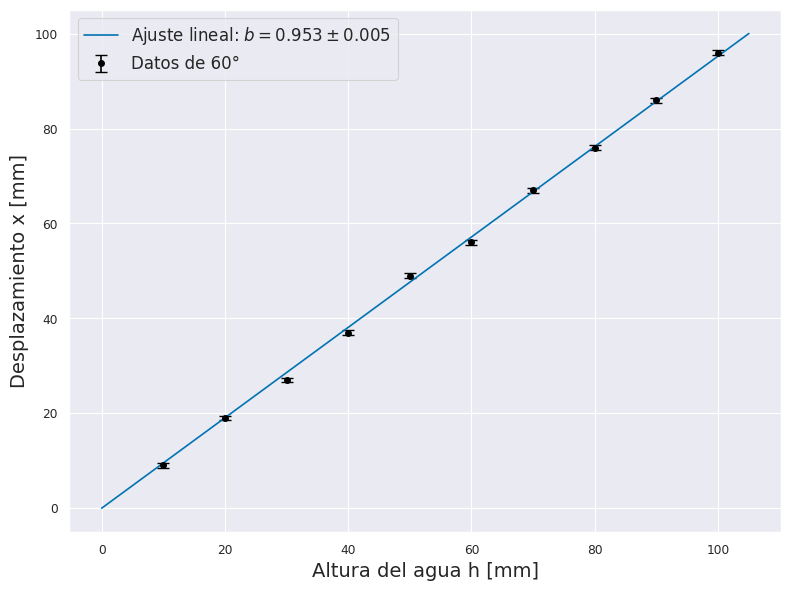

Ángulo incidente: 60.0° ± 0.5°
Pendiente: b = 0.953 ± 0.005
Ángulo de refracción: 37.93°
Índice de refracción: n = 1.41 ± 0.03
--------------------------------------------------


In [ ]:
# Gráficas con barrita de error

# Medimos \theta_i con un transportador, entonces esa incertidumbre corresponde a 0.5.
# Se hace un ajuste x = bh, donde se obtiene b y también la incertidumbre de b.
# Se calcula \theta_r de (u = tan\theta_i - b). (\theta_r = arctan(u)).
# También se calcula el índice n = \frac{sin\theta_i}{sin\theta_r}.
# Se hace la propagación de errores a n por las derivadas de n respecto a b y a \theta_i.

# Altura del agua
h = np.arange(10, 101, 10)

# Desplazamientos del haz del infrarrojo
x_30 = np.array([1, 3, 6, 7, 9, 11, 13, 15, 17, 19]) 
x_45 = np.array([4, 8, 13, 16, 20, 24, 28, 33, 36, 40]) 
x_60 = np.array([9, 19, 27, 37, 49, 56, 67, 76, 86, 96])
# Función lineal
def lineal(h, b):
    return h * b

# Calculo del R2
def R2(x_datos, y_datos, b):
    y_ajuste = lineal(x_datos, b)
    RSS = np.sum((y_datos - y_ajuste)**2)
    TSS = np.sum((y_datos - np.mean(y_datos))**2)
    return 1 - RSS / TSS

# Grosor del vidrio
grosor = 4

# Propagación del error
def Refraccion(ang_in, x, nombre=""):
    # Ajuste con incertidumbre de cada punto
    delta_x = np.full_like(x, 0.5)  # 0.5 mm
    b, cov = curve_fit(lineal, h, x)
    b = b[0]; db = np.sqrt(np.diag(cov))[0]

    # Calculo del R2
    r2 = R2(h, x, b)

    # Gráfica
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.errorbar(h, x, yerr=0.5, fmt="o", capsize=4,
                color="black", markersize=4, label=f"Datos de {nombre}")
    H = np.linspace(0, max(h)*1.05, 100)
    ax.plot(H, lineal(H, b), label=rf"Ajuste lineal: $b = {b:.3f}\pm{db:.3f}$")
    ax.set_xlabel("Altura del agua h [mm]", fontsize=14)
    ax.set_ylabel("Desplazamiento x [mm]", fontsize=14)
    ax.grid(True)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Propagación de errores hacia n
    θi = np.deg2rad(ang_in)
    Δθi = np.deg2rad(0.5)   # 0.5°
    tan_val = np.tan(θi) - b
    θr = np.arctan(tan_val)

    n = np.sin(θi)/np.sin(θr)

    # Derivadas parciales
    dθr_db = -1/(1+tan_val**2)
    dθr_dθi = (1+np.tan(θi)**2)/(1+tan_val**2)

    dn_dθi = (np.cos(θi)/np.sin(θr)) - (np.sin(θi)*np.cos(θr)/np.sin(θr)**2)*dθr_dθi
    dn_db  = -(np.sin(θi)*np.cos(θr)/np.sin(θr)**2)*dθr_db

    Δn = np.sqrt((dn_dθi*Δθi)**2 + (dn_db*db)**2)

    print(f"Ángulo incidente: {ang_in:.1f}° ± 0.5°")
    print(f"Pendiente: b = {b:.3f} ± {db:.3f}")
    print(f"Ángulo de refracción: {np.rad2deg(θr):.2f}°")
    print(f"Índice de refracción: n = {n:.2f} ± {Δn:.2f}")
    print("-"*50)


# Llamadas
Refraccion(30, x_30, "30°")
Refraccion(45, x_45, "45°")
Refraccion(60, x_60, "60°")